### [Cross Decomposition / Partial Least Squares (PLS)](https://scikit-learn.org/stable/modules/cross_decomposition.html)
- A set of supervised estimators for __dimensionality reduction__ & __regression__. Belongs to the *Partial Least Squares (PLS)* family of algorithms.
- CD finds relations between two matrices (X,Y), specifically the direction in X that explains the max variance in Y. (In other words, projecting both X & Y into a lower-dimensional subspace such that covariance(`transformed(X)`,`transformed(Y)`) is maximal.

- Similar to [Principal Component Regression (PCR)](https://en.wikipedia.org/wiki/Principal_component_regression), except that PCR is *unsupervised* dimensionality reduction (You could lose important info in the process. PLS is similar, but considers the `y` targets too.)

- PLS estimators are well suited when the predictors matrix has #variables > #observations, and when [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) is present. (Standard linear regression would fail in this situation unless regularized.)

### [Canonical PLS](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSCanonical.html#sklearn.cross_decomposition.PLSCanonical)

- Given two centered matrices $X \in \mathbb{R}^{n \times d}$ and $Y \in \mathbb{R}^{n \times t}$, and #components $K$:
    - Set $X_1$ to $X$ and $Y_1$ to $Y$. For each $k \in [1, K]$:
        - Find the 1st left ($u_k$) & right ($v_k$) singular vectors of the covariance matrix $C = X_k^T Y_k$.
        - $u_k$ and $v_k$ are the *weights*. They are chosen to maximize the covariance between the projected $X_k$ and a projected target $\text{Cov}(X_k u_k, Y_k v_k)$.
        - Project $X_k$ & $Y_k$ on the singular vectors to obtain *scores*: $\xi_k = X_k u_k$ & $\omega_k = Y_k v_k$. 
        - Regress $X_k$ on $xi_k$ 

### [example: compare cross decomposition methods](https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_compare_cross_decomposition.html#sphx-glr-auto-examples-cross-decomposition-plot-compare-cross-decomposition-py)
- PLS Canonical
- PLS Regression with multivariate response
- PLS Regression with univariate response
- CCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSCanonical as PLSC, PLSRegression as PLSR, CCA

In [2]:
# Dataset based latent variables model

n  = 500
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)
latents = np.array([l1, l1, l2, l2]).T
X = latents + np.random.normal(size=4 * n).reshape((n, 4))
Y = latents + np.random.normal(size=4 * n).reshape((n, 4))

print("shapes: X:\t",X.shape,"\t Y:\t",Y.shape)

X_train = X[:n // 2]; Y_train = Y[:n // 2]
X_test  = X[n // 2:]; Y_test  = Y[n // 2:]

print("Corr(X):\t", np.round(np.corrcoef(X.T), 2))
print("Corr(Y):\t", np.round(np.corrcoef(Y.T), 2))

shapes: X:	 (500, 4) 	 Y:	 (500, 4)
Corr(X):	 [[ 1.    0.44  0.1   0.07]
 [ 0.44  1.   -0.02 -0.03]
 [ 0.1  -0.02  1.    0.48]
 [ 0.07 -0.03  0.48  1.  ]]
Corr(Y):	 [[1.   0.5  0.01 0.08]
 [0.5  1.   0.07 0.04]
 [0.01 0.07 1.   0.45]
 [0.08 0.04 0.45 1.  ]]


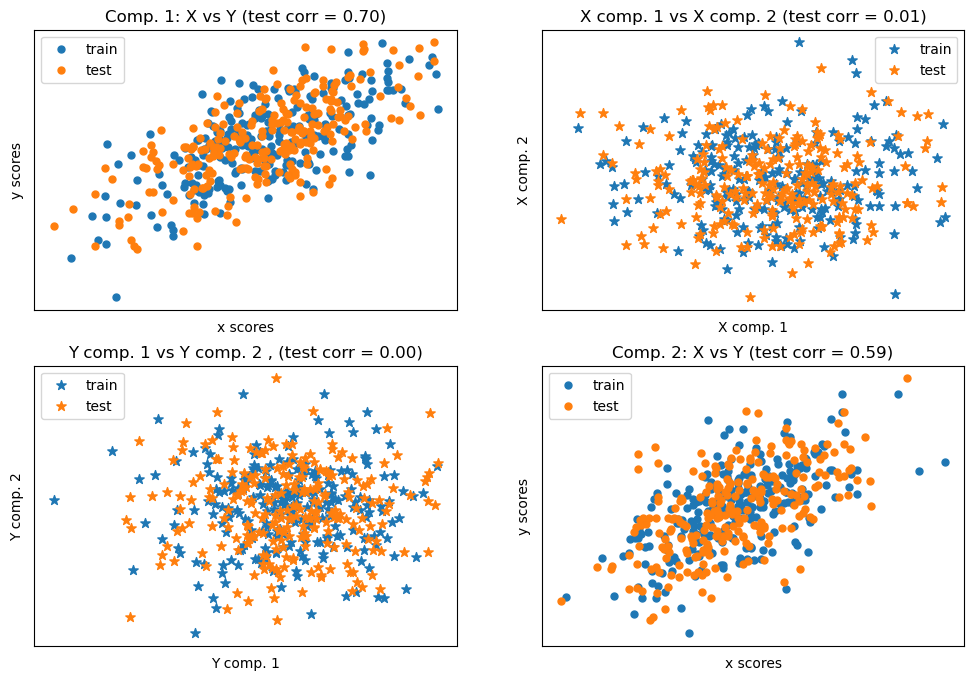

In [3]:
# Canonical (symmetric) PLS

# Transform data
# ~~~~~~~~~~~~~~
plsca = PLSC(n_components=2)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

# Scatter plot of scores
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.scatter(X_train_r[:, 0], Y_train_r[:, 0], label="train", marker="o", s=25)
plt.scatter(X_test_r[:, 0],  Y_test_r[:, 0],  label="test",  marker="o", s=25)

plt.xlabel("x scores"); plt.ylabel("y scores")
plt.xticks(()); plt.yticks(())
plt.legend(loc="best")

plt.title('Comp. 1: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1])

plt.subplot(224)
plt.scatter(X_train_r[:, 1], Y_train_r[:, 1], label="train", marker="o", s=25)
plt.scatter(X_test_r[:, 1],  Y_test_r[:, 1],  label="test",  marker="o", s=25)

plt.xlabel("x scores"); plt.ylabel("y scores")
plt.xticks(());         plt.yticks(())
plt.legend(loc="best")

plt.title('Comp. 2: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1])

# 2) Off diagonal plot components 1 vs 2 for X and Y
plt.subplot(222)
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], label="train", marker="*", s=50)
plt.scatter(X_test_r[:, 0],  X_test_r[:, 1],  label="test",  marker="*", s=50)

plt.xlabel("X comp. 1"); plt.ylabel("X comp. 2")
plt.xticks(()); plt.yticks(())
plt.legend(loc="best")

plt.title('X comp. 1 vs X comp. 2 (test corr = %.2f)'
          % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1])

plt.subplot(223)
plt.scatter(Y_train_r[:, 0], Y_train_r[:, 1], label="train", marker="*", s=50)
plt.scatter(Y_test_r[:, 0],  Y_test_r[:, 1],  label="test",  marker="*", s=50)

plt.xlabel("Y comp. 1"); plt.ylabel("Y comp. 2")
plt.xticks(()); plt.yticks(())
plt.legend(loc="best")

plt.title('Y comp. 1 vs Y comp. 2 , (test corr = %.2f)'
          % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1])

plt.show()

In [4]:
# PLS regression - multivariate response
n,q,p = 1000,3,10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1, 2] + [0] * (p - 2)] * q).T
# each Yj = 1*X1 + 2*X2 + noize
Y = np.dot(X, B) + np.random.normal(size=n * q).reshape((n, q)) + 5

pls2 = PLSR(n_components=3)
pls2.fit(X, Y)
print("True B (such that: Y = XB + Err)")
print(B)
# compare pls2.coef_ with B
print("Estimated B")
print(np.round(pls2.coef_, 1))
pls2.predict(X)

True B (such that: Y = XB + Err)
[[1 1 1]
 [2 2 2]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Estimated B
[[ 1.1  1.9  0.  -0.  -0.  -0.   0.  -0.   0.  -0. ]
 [ 1.   1.9  0.  -0.  -0.  -0.   0.  -0.   0.   0. ]
 [ 1.1  2.  -0.  -0.  -0.  -0.  -0.   0.  -0.  -0. ]]


array([[4.33090119, 4.34003457, 4.41242293],
       [4.13288874, 4.15428095, 4.17750509],
       [6.66097742, 6.61219716, 6.86804879],
       ...,
       [3.86452029, 3.91812137, 3.77886195],
       [4.25154307, 4.27335348, 4.27517767],
       [7.43457169, 7.35498927, 7.73593925]])

In [5]:
# PLS regression - univariate response
n,p = 1000,10
X = np.random.normal(size=n * p).reshape((n, p))
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5
pls1 = PLSR(n_components=3)
pls1.fit(X, y)
# note that the number of components exceeds 1 (the dimension of y)
print("Estimated betas")
print(np.round(pls1.coef_, 1))

Estimated betas
[[ 1.  2. -0. -0. -0. -0.  0.  0. -0.  0.]]


In [6]:
# CCA (PLS mode B with symmetric deflation)
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=2)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = cca.transform(X_train, Y_train)
X_test_r, Y_test_r = cca.transform(X_test, Y_test)

### [SVD PLS](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSSVD.html#sklearn.cross_decomposition.PLSSVD)

- __A simplified version of Canonical PLS__: instead of iteratively deflating $X_k$ and $Y_k$, PLSSVD builds the SVD of $C = X^TY$ only once & stores `n_components` singular vectors corresponding to the biggest singular values found in `U` and `V`.

- The transform is `transfomed(X)=XU` and `transformed(Y)=YV'.

- if `n_components==1`, PLSSVD & Cononical PLS are equal.

### [PLS Regression](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html#sklearn.cross_decomposition.PLSRegression)

- Similar to Canonical PLS with `algorithm='nipals'`, with 2 differences:

    - $v_k$ is not normalized during the $u_k$ & $v_k$ computation step.
    - The $Y_k$ targets are approximated with the projection of $X_k$ (ie, $xi_k$) instead of $Y_k$ (ie, $omega_k$). In other words the loading computation is different.
    - Because of this, the `'predict` and `transform` attributes will be different. 
    - PLS Regression is also known as **PLS1** (single targets) and **PLS2** (multiple targets). It is a form of regularized linear regression where the #components controls regularization strength.

### [Canonical Correlation Analysis (CCA)](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.CCA.html#sklearn.cross_decomposition.CCA)

- Differs from PLS Canonical in how the weights $u_k$ and $v_k$ are computed.
- CCA can be unstable if the #features or #targets is greater than the #samples.

In [7]:
cca = CCA(n_components=2)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = cca.transform(X_train, Y_train)
X_test_r, Y_test_r = cca.transform(X_test, Y_test)

### [example: Principal Component Regression (PCR) vs Partial Least Squares Regression (PLSR)](https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py)

- Goal: show how PLS can outperform PCR when a target is correlated with directions that have a low variance.

- PCR has two steps: 1) Apply PCA to the training data (possibly including dimensionality reduction; 2) train a linear regression on the transformed data. The PCA step is unsupervised, so PCR may perform poorly when the target is correlated with low-variance *directions*.

- PLS does both transformation & regression. It is similar to PCR, except that the transform is supervised.

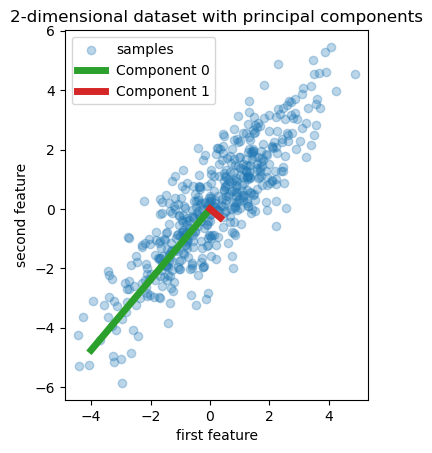

In [8]:
# create 2-feature dataset.
# fit PCA estimator to display two most principal components (ie two directions that explain
# the most variance in the data.)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

rng       = np.random.RandomState(0)
n_samples = 500
cov       = [[3, 3],[3, 4]]

X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)

plt.scatter(X[:, 0], X[:, 1], alpha=.3, label='samples')

for i, (comp, var) in enumerate(zip(pca.components_, 
                                    pca.explained_variance_)):

    comp = comp*var  # scale component by its variance explanation power

    plt.plot([0, comp[0]], 
             [0, comp[1]], 
             label=f"Component {i}", 
             linewidth=5,
             color=f"C{i + 2}")

plt.gca().set(aspect='equal',
              title="2-dimensional dataset with principal components",
              xlabel='first feature', ylabel='second feature')
plt.legend()
plt.show()

- Define y such that it is correlated with a low-variance direction. 
- Then project X onto the 2nd component, and add some noise.

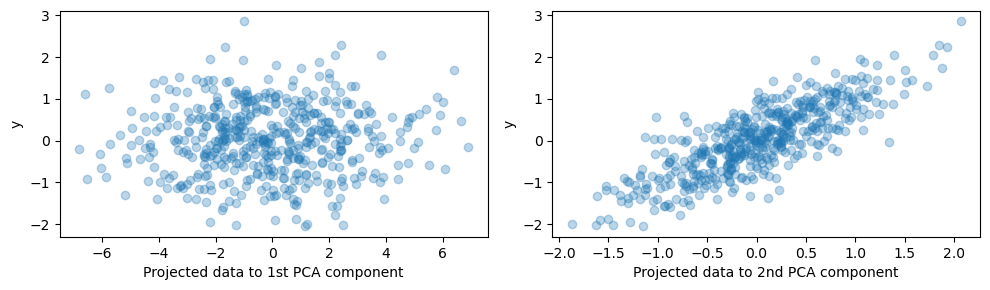

In [9]:
y = X.dot(pca.components_[1]) + rng.normal(size=n_samples) / 2

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].scatter(X.dot(pca.components_[0]), y, alpha=.3)
axes[1].scatter(X.dot(pca.components_[1]), y, alpha=.3)

axes[0].set(xlabel='Projected data to 1st PCA component', ylabel='y')
axes[1].set(xlabel='Projected data to 2nd PCA component', ylabel='y')
plt.tight_layout()
plt.show()

- Create two regressors, PCR & PLS.
- Set #components=1 for illustration.
- Standardize data (best practice) before feeding data into the PCA step of PCR.
- Plot projected data onto 1st component vs the target. Both regressors will use the projected data for training.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

pcr = make_pipeline(StandardScaler(), 
                    PCA(n_components=1), 
                    LinearRegression()); pcr.fit(X_train, y_train)

pca = pcr.named_steps['pca']  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1); pls.fit(X_train, y_train)

PLSRegression(n_components=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


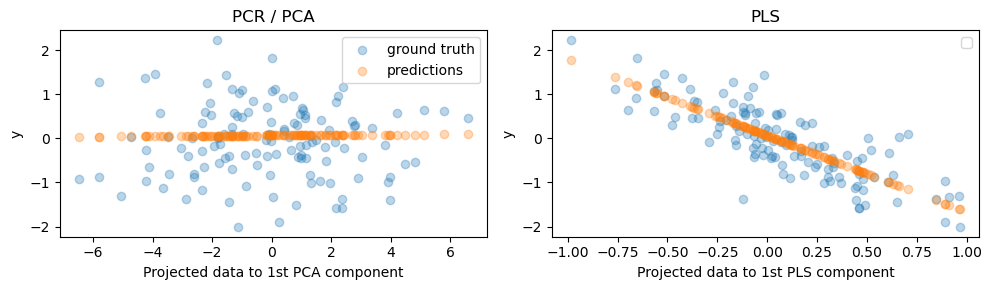

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].scatter(pca.transform(X_test),             y_test,  alpha=.3, label='ground truth')
axes[0].scatter(pca.transform(X_test), pcr.predict(X_test), alpha=.3, label='predictions')

axes[0].set(xlabel='Projected data to 1st PCA component', ylabel='y', title='PCR / PCA')
axes[1].set(xlabel='Projected data to 1st PLS component', ylabel='y', title='PLS')

axes[0].legend(); axes[1].legend()

axes[1].scatter(pls.transform(X_test),             y_test,  alpha=.3, label='ground truth')
axes[1].scatter(pls.transform(X_test), pls.predict(X_test), alpha=.3, label='predictions')

plt.tight_layout(); plt.show()

- The unsupervised PCA transform of PCR has dropped the 2nd component (the one with the least variance), despite it being the most predictive direction.
- The PLS regressor captures the effect, thanks to using the target info during the transform.

In [12]:
# print R-squared scores of both estimators - should confirm PLS being better.
print(f"PRC r^2 score:\t {pcr.score(X_test,y_test):.3f}")
print(f"PLS r^2 score:\t {pls.score(X_test,y_test):.3f}")

PRC r^2 score:	 -0.026
PLS r^2 score:	 0.658


In [13]:
# PCR with 2 components as good as PLS, because PCR could use the 2nd component.
pca_2 = make_pipeline(PCA(n_components=2), LinearRegression())
pca_2.fit(X_train, y_train)
print(f"PCR r^2 score (2 components):\t {pca_2.score(X_test, y_test):.3f}")

PCR r^2 score (2 components):	 0.673
